# Problem Statement.


Price and availability analysis on rental properties in Hyderabad listed on makaan website.

# Data Collection.

In [ ]:
# import all the libraries
import re
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from bs4 import BeautifulSoup

In [ ]:
url = "https://www.makaan.com/hyderabad-residential-property/rent-property-in-hyderabad-city"
# Get the URL from website you choose.

In [ ]:
response = requests.get(url)
# Check the response to scrape the data.
# If response is not equal to '200' we have to use headers.

In [ ]:
response
# Got response 200 , It means We can scrape the data.

<Response [200]>

In [ ]:
response.text

'<!doctype html> <html lang="en"><head><meta http-equiv="Content-type" content="text/html; charset=utf-8"><title>Property for Rent in Hyderabad | 3667+ Properties on rent in Hyderabad</title><meta name="description" content="Find 100% Verified 3667+ Properties for Rent/Lease in Hyderabad on Makaan.com. Search &#10003;2638+ Flats for Rent/Lease. &#10003;601+ Houses/Villas for Rent. Visit Now!"><meta name="keywords" content="houses for rent in Hyderabad, rental flats in Hyderabad, apartments for rent in Hyderabad, flats for rent in Hyderabad, rent house in Hyderabad, rent property in Hyderabad, makaan, makaan.com"><meta name="theme-color" content="#fff" id="themeColor"><meta content="origin" name="referrer"><meta name="p:domain_verify" content="55ce01b3ca93c05fd5a41439a23dd0d9"><meta name="fb:pages" content="155462194517712"><meta name="country" content="India"><meta name="og:type" content="website"><meta name="og:site_name" content="Makaan.com"><meta name="og:image:url" content="http://

In [ ]:
soup = BeautifulSoup(response.text)

In [ ]:
soup

<!DOCTYPE html>
<html lang="en"><head><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><title>Property for Rent in Hyderabad | 3667+ Properties on rent in Hyderabad</title><meta content="Find 100% Verified 3667+ Properties for Rent/Lease in Hyderabad on Makaan.com. Search ✓2638+ Flats for Rent/Lease. ✓601+ Houses/Villas for Rent. Visit Now!" name="description"/><meta content="houses for rent in Hyderabad, rental flats in Hyderabad, apartments for rent in Hyderabad, flats for rent in Hyderabad, rent house in Hyderabad, rent property in Hyderabad, makaan, makaan.com" name="keywords"/><meta content="#fff" id="themeColor" name="theme-color"/><meta content="origin" name="referrer"/><meta content="55ce01b3ca93c05fd5a41439a23dd0d9" name="p:domain_verify"/><meta content="155462194517712" name="fb:pages"/><meta content="India" name="country"/><meta content="website" name="og:type"/><meta content="Makaan.com" name="og:site_name"/><meta content="http://static.makaan.com/6/12/35

In [ ]:
soup.find_all("div",class_="infoWrap")
# Select the 'Tag' and 'class' for which you want to scrape the data.

[<div class="infoWrap" itemprop="event" itemref="itemImageFor-23475672" itemscope="" itemtype="http://schema.org/Event"><div class="title-line-wrap"><div class="title-line"><a class="typelink" data-type="listing-link" href="https://www.makaan.com/hyderabad/builder-project-in-lingampally-23475672/2bhk-2t-1100-sqft-apartment-for-rent" itemprop="url" target="_blank"><meta content="2 BHK Apartment for rent" id="itemNameFor-23475672" itemprop="name"/><strong><span class="val">2 </span><span>BHK </span><span>Apartment</span></strong></a></div><div style="width:100%"><div class="locWrap" itemprop="location" itemscope="" itemtype="http://schema.org/Place" style="width:60%;float:left"><span><span itemprop="address" itemscope="" itemtype="http://schema.org/PostalAddress" title="Rent property in Lingampally Hyderabad"><span class="locName"><a class="loclink" data-link-name="Lingampally Hyderabad" data-link-type="locality rent serp" data-type="localityName" href="https://www.makaan.com/hyderabad-p

In [ ]:
soup.find_all("div",class_="infoWrap")[0].text
# The data listed in the website

'2 BHK ApartmentLingampally, HyderabadSpecifications 18,000 Price1100 Area in sq ftUnfurnishedStatusNo Deposit2 bathrooms2 BHK Rental Property in Lingampally Hyderabad:A 2 bhk property is available for rent in Lingampally, Hyderabad. It has an area of 1100 sqft with a carpet area of 1100 sqft . The property is available at a monthly rental of Rs. 18,000 . It is an u...MoreView Phone Connect Now'

In [ ]:
for i in soup.find_all("div",class_="infoWrap"):
    print(i.text)

# check all the data listed under this 'tag' and 'class'

2 BHK ApartmentLingampally, HyderabadSpecifications 18,000 Price1100 Area in sq ftUnfurnishedStatusNo Deposit2 bathrooms2 BHK Rental Property in Lingampally Hyderabad:A 2 bhk property is available for rent in Lingampally, Hyderabad. It has an area of 1100 sqft with a carpet area of 1100 sqft . The property is available at a monthly rental of Rs. 18,000 . It is an u...MoreView Phone Connect Now
1 BHK Apartment in My Home NavadweepaMadhapur, HyderabadSpecifications 10,000 Price750 Area in sq ftFurnishedStatusNo Deposit1 bathrooms1 BHK Rental Property in Madhapur Hyderabad:Itâs a 1 bhk multistorey apartment situated in My Home Constructions Navadweepa, Madhapur, Hyderabad. It has an area of 750 sqft with a carpet area of 750 sqft . The property is available at a monthly...Developed by My Home ConstructionsMoreView Phone Connect Now
3 BHK Apartment in Aparna AltiusShamshabad, HyderabadSpecifications 48,000 Price1806 Area in sq ftSemi-FurnishedStatusNo Deposit3 bathroomsNorthEast facing3 

In [ ]:
BHK = []
Bathrooms = []
Property_Type = []
Price  = []
Area = []
Furnishing = []
Facing=[]
Location = []
for i in soup.find_all("div",class_="infoWrap"):

    if re.findall("^\d",i.text):
        BHK.append("".join(re.findall("^\d",i.text)))
    else:
        BHK.append(np.nan)

    if re.findall("Deposit\s*(\d+)",i.text):
        Bathrooms.append("".join(re.findall("Deposit\s*(\d+)",i.text)))
    else:
        Bathrooms.append(np.nan)

    if re.findall("(Apartment|Independent House|Independent Floor|Villa)",i.text):
        Property_Type.append("".join(re.findall("(Apartment|Independent House|Independent Floor|Villa)",i.text)))
    else:
        Property_Type.append(np.nan)

    if re.findall("(\d+,\d+)\sP",i.text):
        Price.append("".join(re.findall("(\d+,\d+)\sP",i.text)))
    else:
        Price.append(np.nan)

    if re.findall("e(\d+)\sA",i.text):
        Area.append("".join(re.findall("e(\d+)\sA",i.text)))
    else:
        Area.append(np.nan)

    fur = i.find('td', class_='val')
    if fur:
        Furnishing.append(fur.text.strip())
    else:
        Furnishing.append(np.nan)

    if re.findall("s(\w+)\sfacing",i.text):
        Facing.append("".join(re.findall("s(\w+)\sfacing",i.text)))
    else:
        Facing.append(np.nan)

    loc = i.find("div", class_="locWrap")
    if loc:
        Location.append(loc.text.strip())
    else:
        Location.append(np.nan)


# writing regex pattersn to match the data required.

In [ ]:
BHK = []
Bathrooms = []
Property_Type = []
Price  = []
Area = []
Furnishing = []
Facing=[]
Location = []

for i in range(1,70):
    url=(f"https://www.makaan.com/hyderabad-residential-property/rent-property-in-hyderabad-city?page={i}&_=1717664604152")
    # Doing it for multiple pages to get more numbers of rows of data to analyze.

    for i in soup.find_all("div",class_="infoWrap"):

        if re.findall("^\d",i.text):
            BHK.append("".join(re.findall("^\d",i.text)))
        else:
            BHK.append(np.nan)

        if re.findall("Deposit\s*(\d+)",i.text):
            Bathrooms.append("".join(re.findall("Deposit\s*(\d+)",i.text)))
        else:
            Bathrooms.append(np.nan)

        if re.findall("(Apartment|Independent House|Independent Floor|Villa)",i.text):
            Property_Type.append("".join(re.findall("(Apartment|Independent House|Independent Floor|Villa)",i.text)))
        else:
            Property_Type.append(np.nan)

        if re.findall("(\d+,\d+)\sP",i.text):
            Price.append("".join(re.findall("(\d+,\d+)\sP",i.text)))
        else:
            Price.append(np.nan)

        if re.findall("e(\d+)\sA",i.text):
            Area.append("".join(re.findall("e(\d+)\sA",i.text)))
        else:
            Area.append(np.nan)

        fur = i.find('td', class_='val')
        if fur:
            Furnishing.append(fur.text.strip())
        else:
            Furnishing.append(np.nan)

        if re.findall("s(\w+)\sfacing",i.text):
            Facing.append("".join(re.findall("s(\w+)\sfacing",i.text)))
        else:
            Facing.append(np.nan)

        loc = i.find("div", class_="locWrap")
        if loc:
            Location.append(''.join(loc.text.replace(",", "").strip().split()[:-1]))
        else:
            Location.append(np.nan)

In [ ]:
print(len(BHK))
print(len(Bathrooms))
print(len(Property_Type))
print(len(Price))
print(len(Area))
print(len(Furnishing))
print(len(Facing))
print(len(Location))

1380
1380
1380
1380
1380
1380
1380
1380


In [ ]:
data = pd.DataFrame({
    "BHK":BHK,
    "Bathrooms":Bathrooms,
    "Property_Type":Property_Type,
    "Price":Price,
    "Area":Area,
    "Furnishing":Furnishing,
    "Facing":Facing,
    "Location":Location

})

In [ ]:
data.to_csv(r"makaan_Raw_Data")
# Exporting it to CSV file.

In [ ]:
data = pd.read_csv(r"makaan_Raw_Data")
# Reading the CSV file .

In [ ]:
data

,Unnamed: 0,BHK,Bathrooms,Property_Type,Price,Area,Furnishing,Facing,Location
0,0,2,2,Apartment,"18,000",1100,Unfurnished,NaN,Lingampally
1,1,1,1,Apartment,"10,000",750,Furnished,NaN,Madhapur
2,2,3,3,Apartment,"48,000",1806,Semi-Furnished,NorthEast,Shamshabad
3,3,2,2,Independent Floor,"28,000",700,Semi-Furnished,NaN,Upparpally
4,4,3,3,Apartment,"16,000",990,Semi-Furnished,NaN,Manikonda
...,...,...,...,...,...,...,...,...,...
1375,1375,3,3,Apartment,"30,000",1548,Furnished,North,BandlagudaJagir
1376,1376,1,1,Independent HouseIndependent HouseIndependent ...,"6,500",800,Semi-Furnished,NaN,TurkaYamjal
1377,1377,3,3,Independent Floor,"20,000",1800,Semi-Furnished,NaN,ToliChowki
1378,1378,3,2,Apartment,"17,000",1330,Semi-Furnished,West,Neredmet


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1380 non-null   int64 
 1   BHK            1380 non-null   int64 
 2   Bathrooms      1380 non-null   int64 
 3   Property_Type  1380 non-null   object
 4   Price          1380 non-null   object
 5   Area           1380 non-null   int64 
 6   Furnishing     1380 non-null   object
 7   Facing         759 non-null    object
 8   Location       1380 non-null   object
dtypes: int64(4), object(5)
memory usage: 97.2+ KB


In [ ]:
data.head()

,Unnamed: 0,BHK,Bathrooms,Property_Type,Price,Area,Furnishing,Facing,Location
0,0,2,2,Apartment,"18,000",1100,Unfurnished,NaN,Lingampally
1,1,1,1,Apartment,"10,000",750,Furnished,NaN,Madhapur
2,2,3,3,Apartment,"48,000",1806,Semi-Furnished,NorthEast,Shamshabad
3,3,2,2,Independent Floor,"28,000",700,Semi-Furnished,NaN,Upparpally
4,4,3,3,Apartment,"16,000",990,Semi-Furnished,NaN,Manikonda


In [ ]:
data.tail()

,Unnamed: 0,BHK,Bathrooms,Property_Type,Price,Area,Furnishing,Facing,Location
1375,1375,3,3,Apartment,"30,000",1548,Furnished,North,BandlagudaJagir
1376,1376,1,1,Independent HouseIndependent HouseIndependent ...,"6,500",800,Semi-Furnished,NaN,TurkaYamjal
1377,1377,3,3,Independent Floor,"20,000",1800,Semi-Furnished,NaN,ToliChowki
1378,1378,3,2,Apartment,"17,000",1330,Semi-Furnished,West,Neredmet
1379,1379,1,1,Apartment,"10,000",763,Furnished,NorthEast,Kondapur


In [ ]:
data.isnull().sum()

Unnamed: 0         0
BHK                0
Bathrooms          0
Property_Type      0
Price              0
Area               0
Furnishing         0
Facing           621
Location           0
dtype: int64

# Data Cleaning

In [ ]:
data

,Unnamed: 0,BHK,Bathrooms,Property_Type,Price,Area,Furnishing,Facing,Location
0,0,2,2,Apartment,"18,000",1100,Unfurnished,NaN,Lingampally
1,1,1,1,Apartment,"10,000",750,Furnished,NaN,Madhapur
2,2,3,3,Apartment,"48,000",1806,Semi-Furnished,NorthEast,Shamshabad
3,3,2,2,Independent Floor,"28,000",700,Semi-Furnished,NaN,Upparpally
4,4,3,3,Apartment,"16,000",990,Semi-Furnished,NaN,Manikonda
...,...,...,...,...,...,...,...,...,...
1375,1375,3,3,Apartment,"30,000",1548,Furnished,North,BandlagudaJagir
1376,1376,1,1,Independent HouseIndependent HouseIndependent ...,"6,500",800,Semi-Furnished,NaN,TurkaYamjal
1377,1377,3,3,Independent Floor,"20,000",1800,Semi-Furnished,NaN,ToliChowki
1378,1378,3,2,Apartment,"17,000",1330,Semi-Furnished,West,Neredmet


In [ ]:
data.drop("Unnamed: 0",inplace=True,axis = 1)

In [ ]:
data["Property_Type"].unique()

array(['Apartment', 'Independent Floor', 'ApartmentApartment',
       'Independent FloorIndependent FloorIndependent Floor',
       'Independent HouseIndependent HouseIndependent House'],
      dtype=object)

In [ ]:
data["Property_Type"]=data["Property_Type"].replace('ApartmentApartmentApartmentApartment', 'Apartment')
data["Property_Type"]=data["Property_Type"].replace('ApartmentApartment', 'Apartment')
data["Property_Type"]=data["Property_Type"].replace('Independent FloorIndependent FloorIndependent Floor', 'Independent Floor')
data["Property_Type"]=data["Property_Type"].replace('Independent HouseIndependent HouseIndependent House', 'Independent House')
data["Property_Type"]=data["Property_Type"].replace('Independent HouseIndependent House', 'Independent House')
# Handling the invalid values\data.

In [ ]:
data["Property_Type"].unique()

array(['Apartment', 'Independent Floor', 'Independent House'],
      dtype=object)

In [ ]:
data["Price"].unique()

array(['18,000', '10,000', '48,000', '28,000', '16,000', '17,000',
       '15,000', '25,000', '75,000', '6,500', '40,000', '11,000',
       '30,000', '20,000'], dtype=object)

In [ ]:
# Datatype of price is in object so we have to clean it.
data['Price'] = data['Price'].str.replace(',', '', regex=True)# replacing the comma
data['Price'] = data['Price'].astype(int)
data["Price"].unique()

array([18000, 10000, 48000, 28000, 16000, 17000, 15000, 25000, 75000,
        6500, 40000, 11000, 30000, 20000])

In [ ]:
# Now we have to handles NaN values in facing columns
# Replace missing values with 'Unknown'
data['Facing'] = data['Facing'].fillna('Unknown')
data['Facing'].unique()

array(['Unknown', 'NorthEast', 'East', 'West', 'Westt', 'North'],
      dtype=object)

In [ ]:
data["Facing"]=data["Facing"].replace('Westt', 'West') # Fixing "NorthEastt" value to "NorthEast"
data['Facing'].unique()

array(['Unknown', 'NorthEast', 'East', 'West', 'North'], dtype=object)

In [ ]:
data['Location'].unique()

array(['Lingampally', 'Madhapur', 'Shamshabad', 'Upparpally', 'Manikonda',
       'Hayathnagar', 'Kompally', 'Bowenpally', 'Pocharam', 'Gachibowli',
       'Dammaiguda', 'Hafeezpet', 'Bolarum', 'BandlagudaJagir',
       'TurkaYamjal', 'ToliChowki', 'Neredmet', 'Kondapur'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   BHK            1380 non-null   int64 
 1   Bathrooms      1380 non-null   int64 
 2   Property_Type  1380 non-null   object
 3   Price          1380 non-null   int64 
 4   Area           1380 non-null   int64 
 5   Furnishing     1380 non-null   object
 6   Facing         1380 non-null   object
 7   Location       1380 non-null   object
dtypes: int64(4), object(4)
memory usage: 86.4+ KB


In [ ]:
# now get the cleaned data set
data.to_csv("EDA_Cleaned data")

In [ ]:
data1 = pd.read_csv(r"EDA_Cleaned data")
data1

,Unnamed: 0,BHK,Bathrooms,Property_Type,Price,Area,Furnishing,Facing,Location
0,0,2,2,Apartment,18000,1100,Unfurnished,Unknown,Lingampally
1,1,1,1,Apartment,10000,750,Furnished,Unknown,Madhapur
2,2,3,3,Apartment,48000,1806,Semi-Furnished,NorthEast,Shamshabad
3,3,2,2,Independent Floor,28000,700,Semi-Furnished,Unknown,Upparpally
4,4,3,3,Apartment,16000,990,Semi-Furnished,Unknown,Manikonda
...,...,...,...,...,...,...,...,...,...
1375,1375,3,3,Apartment,30000,1548,Furnished,North,BandlagudaJagir
1376,1376,1,1,Independent House,6500,800,Semi-Furnished,Unknown,TurkaYamjal
1377,1377,3,3,Independent Floor,20000,1800,Semi-Furnished,Unknown,ToliChowki
1378,1378,3,2,Apartment,17000,1330,Semi-Furnished,West,Neredmet


In [ ]:
data1.drop("Unnamed: 0",inplace=True,axis = 1)

In [ ]:
data1

,BHK,Bathrooms,Property_Type,Price,Area,Furnishing,Facing,Location
0,2,2,Apartment,18000,1100,Unfurnished,Unknown,Lingampally
1,1,1,Apartment,10000,750,Furnished,Unknown,Madhapur
2,3,3,Apartment,48000,1806,Semi-Furnished,NorthEast,Shamshabad
3,2,2,Independent Floor,28000,700,Semi-Furnished,Unknown,Upparpally
4,3,3,Apartment,16000,990,Semi-Furnished,Unknown,Manikonda
...,...,...,...,...,...,...,...,...
1375,3,3,Apartment,30000,1548,Furnished,North,BandlagudaJagir
1376,1,1,Independent House,6500,800,Semi-Furnished,Unknown,TurkaYamjal
1377,3,3,Independent Floor,20000,1800,Semi-Furnished,Unknown,ToliChowki
1378,3,2,Apartment,17000,1330,Semi-Furnished,West,Neredmet


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   BHK            1380 non-null   int64 
 1   Bathrooms      1380 non-null   int64 
 2   Property_Type  1380 non-null   object
 3   Price          1380 non-null   int64 
 4   Area           1380 non-null   int64 
 5   Furnishing     1380 non-null   object
 6   Facing         1380 non-null   object
 7   Location       1380 non-null   object
dtypes: int64(4), object(4)
memory usage: 86.4+ KB


In [ ]:
data1.describe()

,BHK,Bathrooms,Price,Area
count,1380.000000,1380.000000,1380.000000,1380.000000
mean,2.050000,2.050000,22450.000000,1127.050000
std,0.804966,0.740201,15899.864544,372.734117
min,1.000000,1.000000,6500.000000,650.000000
25%,1.000000,1.750000,14000.000000,790.750000
50%,2.000000,2.000000,17000.000000,1077.500000
75%,3.000000,3.000000,25750.000000,1384.500000
max,3.000000,3.000000,75000.000000,1806.000000


# Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

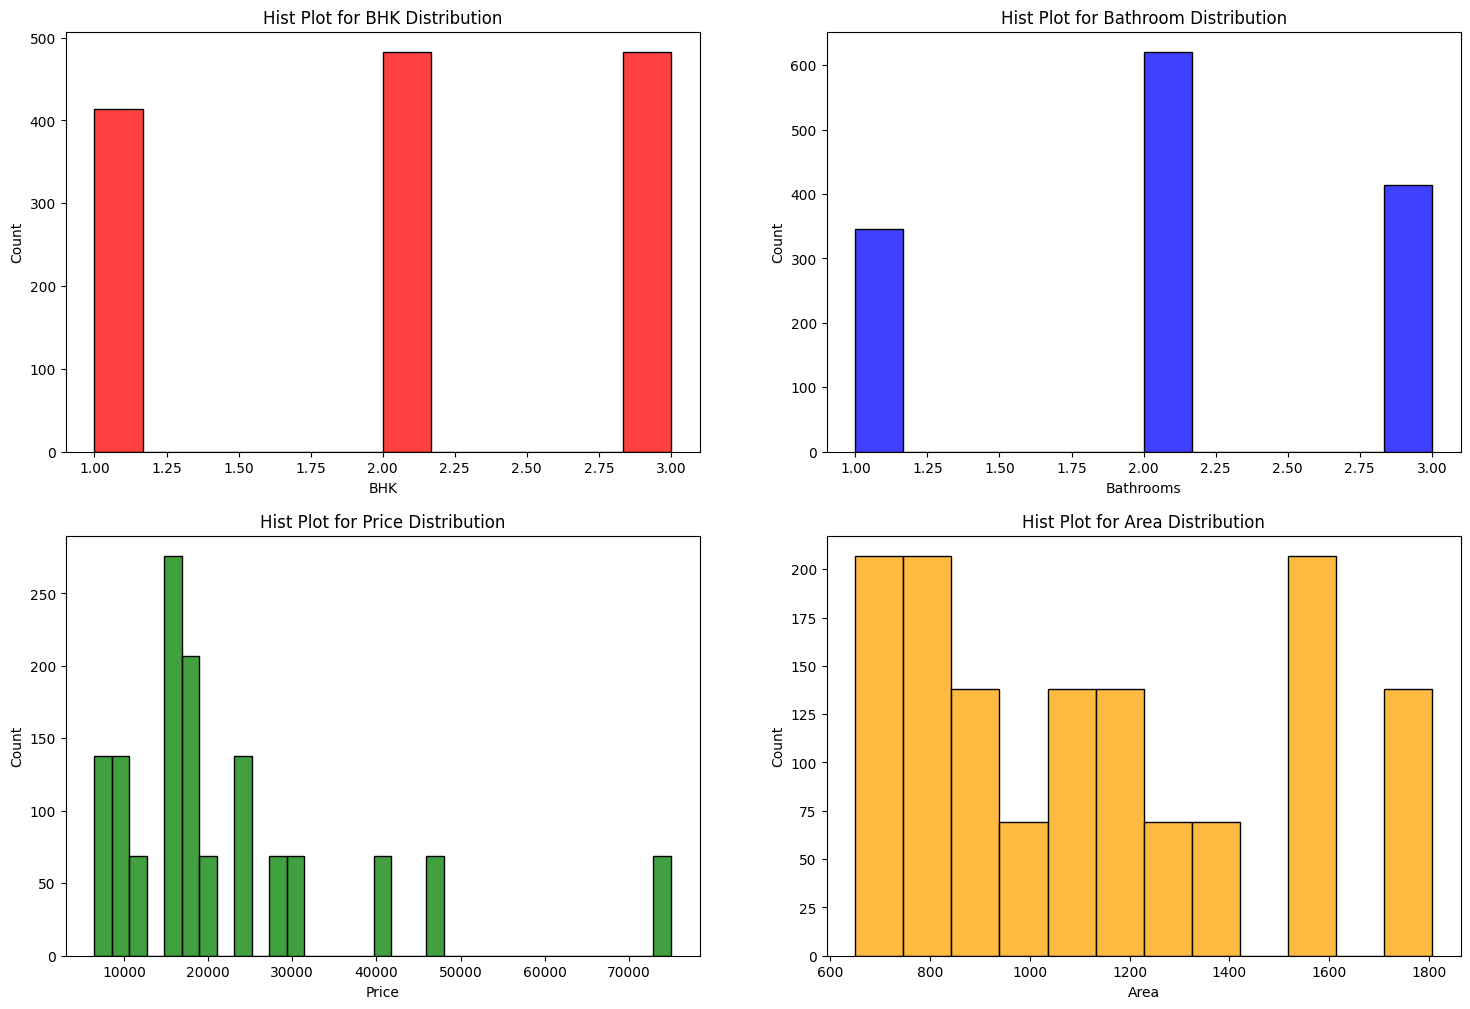

In [ ]:
# Univariate Analysis
# Distribution of Numerical Columns.
# BHK and Bathrooms are limited 3 values i.e; it is discrete data.
# More number of properties listed in 10k-30k price range.
# We have very less properties listed with high property size.
fig,axis = plt.subplots(2,2,figsize=(18,12))
axis[0][0].set_title('Hist Plot for BHK Distribution')
axis[0][1].set_title('Hist Plot for Bathroom Distribution')
axis[1][0].set_title('Hist Plot for Price Distribution')
axis[1][1].set_title('Hist Plot for Area Distribution')
sns.histplot(data1['BHK'],color = 'Red',ax = axis [0][0])
sns.histplot(data1['Bathrooms'],color= 'Blue', ax= axis [0][1])
sns.histplot(data1['Price'],color = 'Green',ax = axis [1][0])
sns.histplot(data1['Area'],color= 'Orange', ax= axis [1][1])
plt.show()

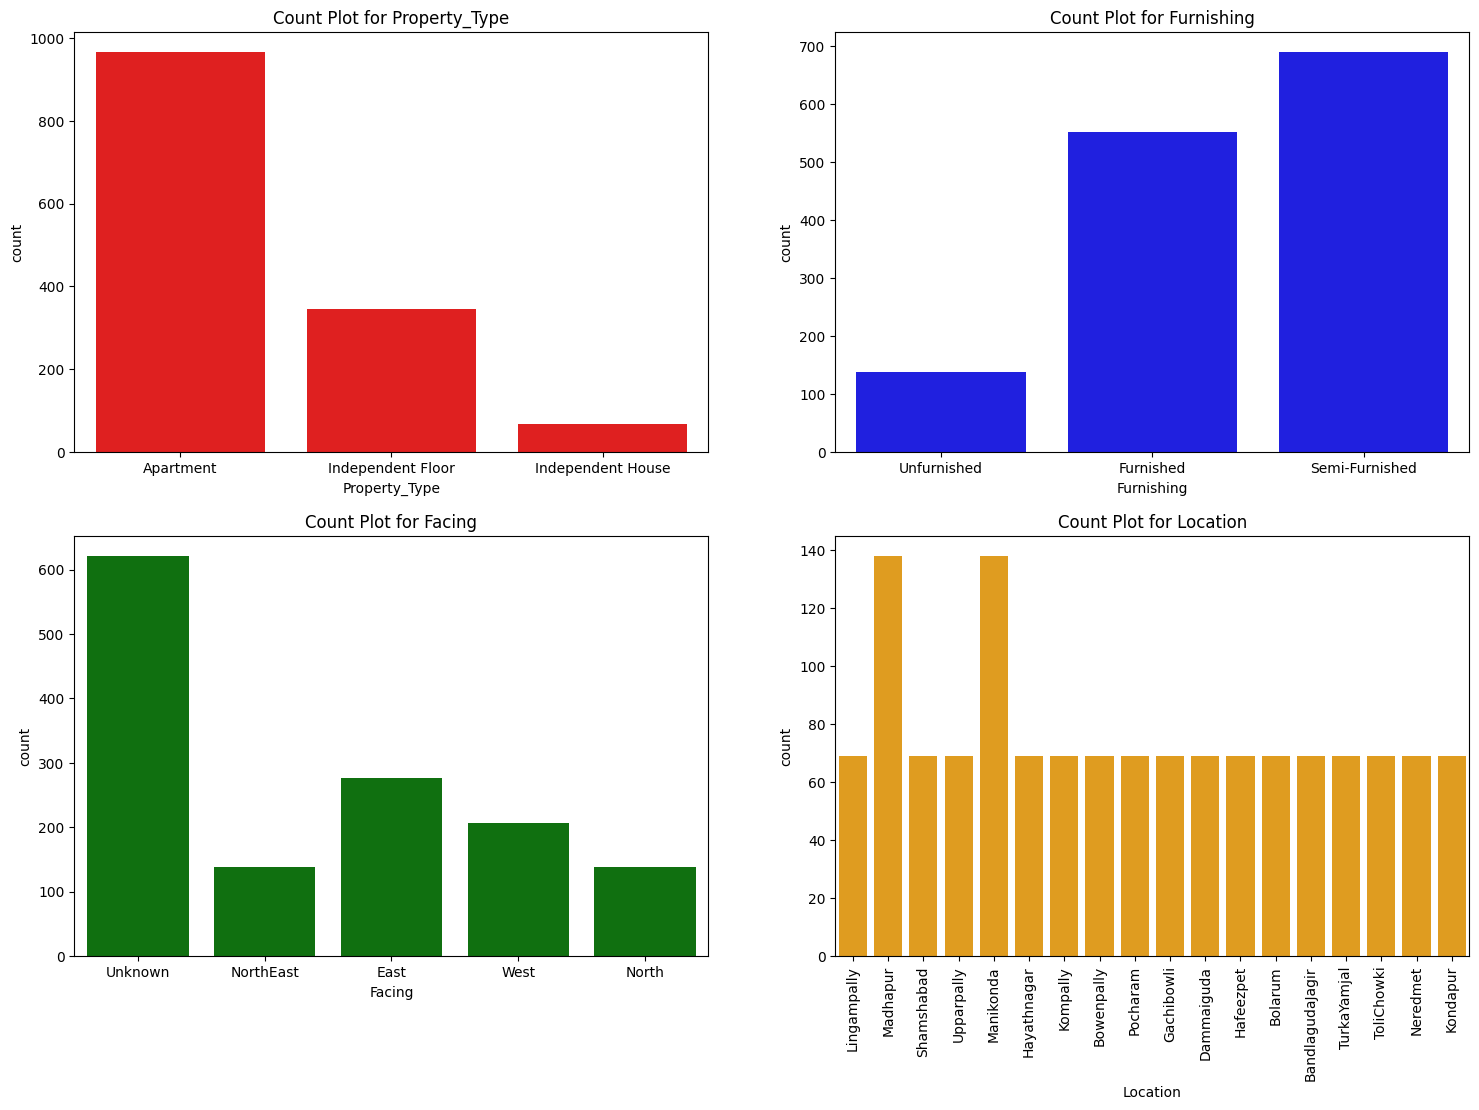

In [ ]:
# Distribution of Catogerical Columns.
# Apartments are listed  more, and property type is only limited 3 types on this website.
# Moree number of Unfurnished properties are listed.
# we can see more number of properties are listed in madhapur and manikonda , whereas all other have equal count.
fig,axis = plt.subplots(2,2,figsize=(18,12))
axis[0][0].set_title('Count Plot for Property_Type')
axis[0][1].set_title('Count Plot for Furnishing')
axis[1][0].set_title('Count Plot for Facing')
axis[1][1].set_title('Count Plot for Location')
plt.xticks(rotation = 90)
sns.countplot(x='Property_Type',color = 'Red',ax = axis [0][0],data = data1)
sns.countplot(x='Furnishing',color = 'Blue',ax= axis [0][1],data = data1)
sns.countplot(x='Facing',color = 'Green',ax = axis [1][0],data = data1)
sns.countplot(x='Location',color = 'Orange',ax= axis [1][1],data = data1)
plt.show()

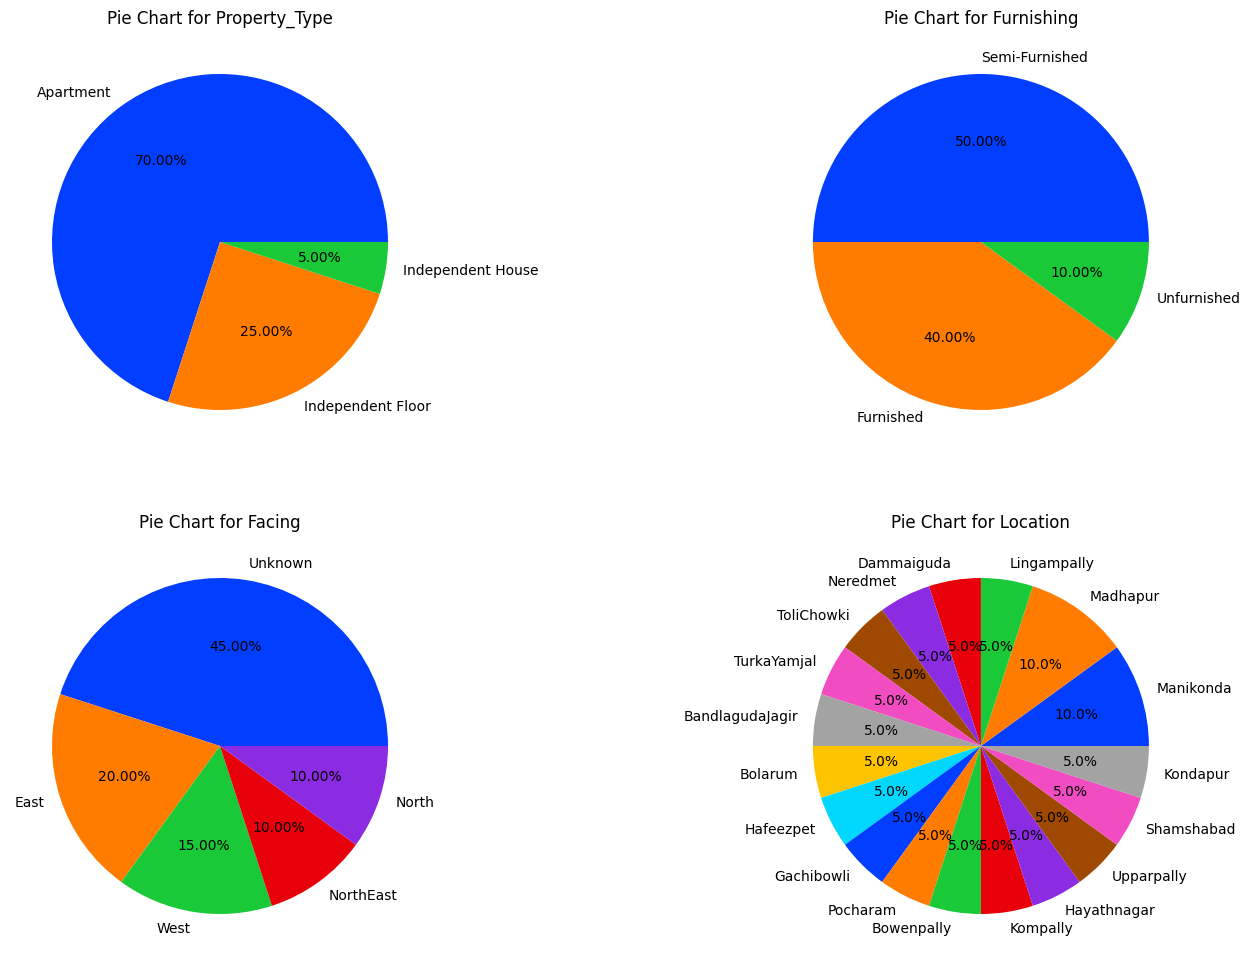

In [ ]:
# Percentage Distribution of Categorical COlumns
# it shows what percentage of distribution is present.
# if you see facing coulumn , there are more unknown columns.i.e; for about 45% of properties facing is not listed.
# You can see all areas have equal distribution except that of madhapur and manikonda.
fig,axis = plt.subplots(2,2,figsize=(18,12))
axis[0][0].set_title('Pie Chart for Property_Type')
axis[0][1].set_title('Pie Chart for Furnishing')
axis[1][0].set_title('Pie Chart for Facing')
axis[1][1].set_title('Pie Chart for Location')
colors = sns.color_palette('bright')
x1 = data1['Property_Type'].value_counts()
x2 = data1['Furnishing'].value_counts()
x3 = data1['Facing'].value_counts()
x4 = data1['Location'].value_counts()
axis[0][0].pie(x1, labels=x1.index, autopct='%.2f%%',colors=colors)
axis[0][1].pie(x2, labels=x2.index, autopct='%.2f%%',colors=colors)
axis[1][0].pie(x3, labels=x3.index, autopct='%.2f%%',colors=colors)
axis[1][1].pie(x4, labels=x4.index, autopct='%.1f%%',colors=colors)
plt.show()

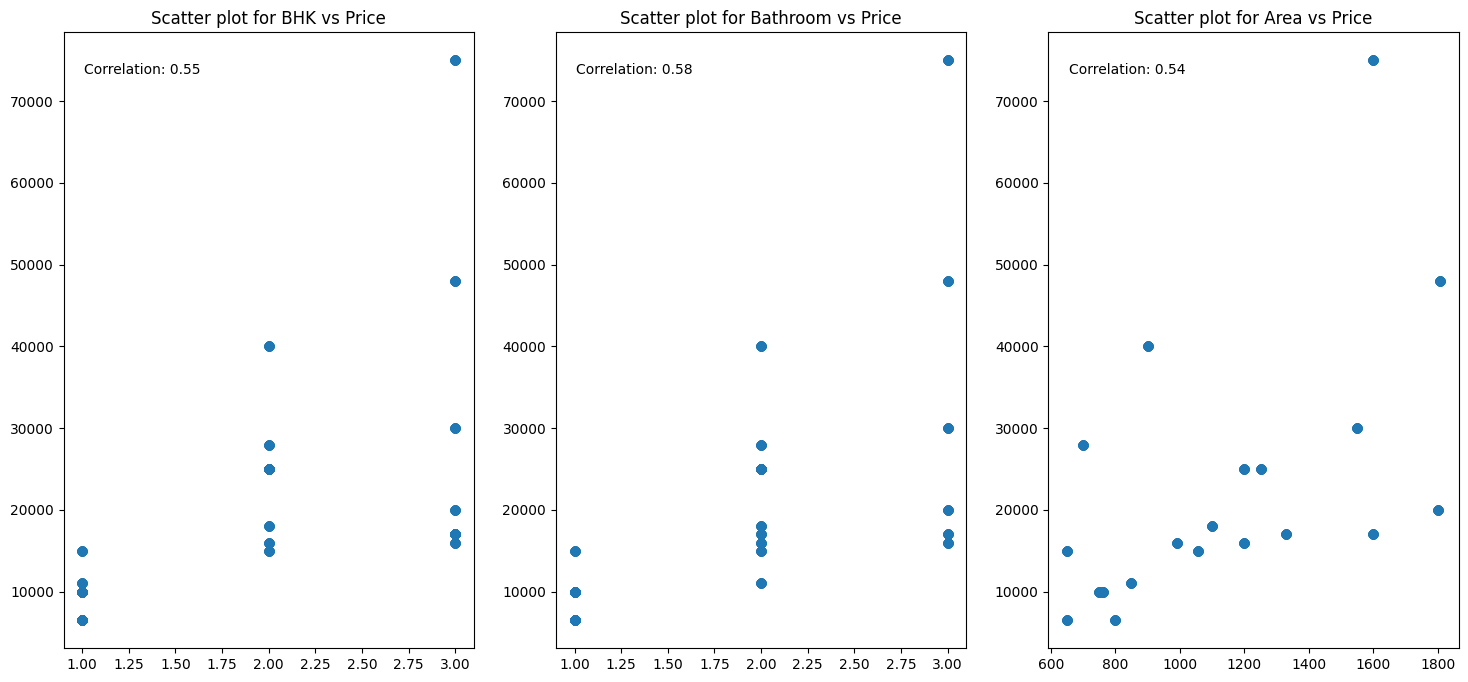

In [ ]:
# Bi-variate Analysis
# Numerical VS Numerical
# BHK vs Price
# Bathrooms vs Price
# Area vs Price
# We use scatterplot to get the relationship by evaluating the corealtion coefficent value.
fig,axis = plt.subplots(1,3,figsize=(18,8))
axis[0].set_title('Scatter plot for BHK vs Price')
axis[0].scatter(data1['BHK'],data1['Price'])
correlation_bhk_price = data1['BHK'].corr(data1['Price'])
axis[0].text(0.05, 0.95, f'Correlation: {correlation_bhk_price:.2f}', transform=axis[0].transAxes, verticalalignment='top')

# There is low to medium positively relationship between BHK vs Price.

axis[1].set_title('Scatter plot for Bathroom vs Price')
axis[1].scatter(data1['Bathrooms'],data1['Price'])
correlation_bathrooms_price = data1['Bathrooms'].corr(data1['Price'])
axis[1].text(0.05, 0.95, f'Correlation: {correlation_bathrooms_price:.2f}', transform=axis[1].transAxes, verticalalignment='top')

# Bathrooms vs Price are low-medium positively correlated.


axis[2].set_title('Scatter plot for Area vs Price')
axis[2].scatter(data1['Area'],data1['Price'])
correlation_area_price = data1['Area'].corr(data1['Price'])
axis[2].text(0.05, 0.95, f'Correlation: {correlation_area_price:.2f}', transform=axis[2].transAxes, verticalalignment='top')

# Area and Price are low to medium positively correlated with each each other.

plt.show()

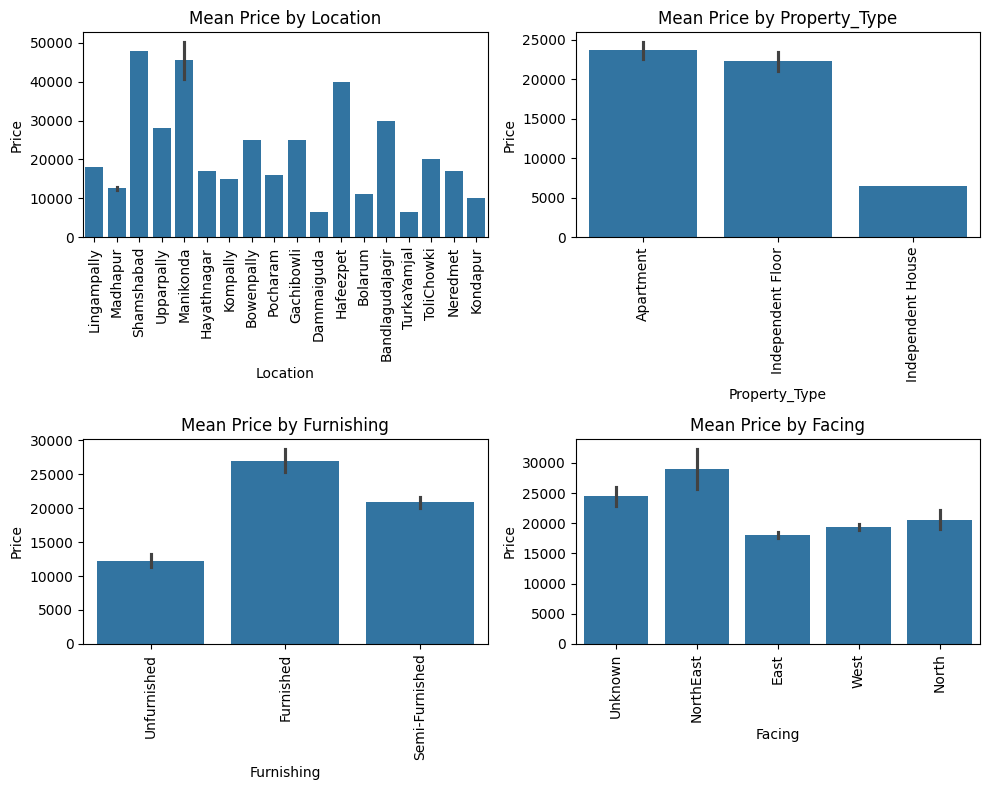

In [ ]:
# Numerical vs Categorical (bar plot )
# Location vs Price
# Property_type vs Price
# Furnishing vs Price
# Facing vs Price
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.barplot(x='Location',y='Price',data=data1,estimator=np.mean)
plt.title('Mean Price by Location')
plt.xticks(rotation=90)
# Avg price of properties in shamshabad and manikonda are higher . This might because of the IT sector and Airport.
# Even though equal number of properties listed in most of the areas , but the avg price variesdepening on the demand.

plt.subplot(2,2,2)
sns.barplot(x='Property_Type',y='Price',data=data1,estimator=np.mean)
plt.title('Mean Price by Property_Type')
plt.xticks(rotation=90)
# Independant House have very mean price compare to other properties . whereas ,
# Apartment and independant floor doesn't have differnce in avg price .

plt.subplot(2,2,3)
sns.barplot(x='Furnishing',y='Price',data=data1,estimator=np.mean)
plt.title('Mean Price by Furnishing')
plt.xticks(rotation=90)
# semi and unfurnished does not have much price differnce.

plt.subplot(2,2,4)
sns.barplot(x='Facing',y='Price',data=data1,estimator=np.mean)
plt.title('Mean Price by Facing')
plt.xticks(rotation=90)
# rental price for northeast facing is high.And for all other three there is no much differnce is price.

plt.tight_layout()
plt.show()

In [ ]:
#  pivot table
# This is Numerical presentation of the barplot for average .
# you can check it will tell us the same information but in tabular form.
pivot_location = data1.pivot_table(values='Price', index='Location', aggfunc='mean').reset_index()
pivot_property_type = data1.pivot_table(values='Price', index='Property_Type', aggfunc='mean').reset_index()
pivot_furnishing = data1.pivot_table(values='Price', index='Furnishing', aggfunc='mean').reset_index()
pivot_facing = data1.pivot_table(values='Price', index='Facing', aggfunc='mean').reset_index()
print(" Average Price by Location")
print(pivot_location)
print('')
print("Average Price by Property Type")
print(pivot_property_type)
print('')
print("Average Price by Furnishing")
print(pivot_furnishing)
print('')
print("Average Price by Facing")
print(pivot_facing)

 Average Price by Location
           Location  Price
0   BandlagudaJagir  30000
1           Bolarum  11000
2        Bowenpally  25000
3        Dammaiguda   6500
4        Gachibowli  25000
5         Hafeezpet  40000
6       Hayathnagar  17000
7          Kompally  15000
8          Kondapur  10000
9       Lingampally  18000
10         Madhapur  12500
11        Manikonda  45500
12         Neredmet  17000
13         Pocharam  16000
14       Shamshabad  48000
15       ToliChowki  20000
16      TurkaYamjal   6500
17       Upparpally  28000

Average Price by Property Type
       Property_Type         Price
0          Apartment  23642.857143
1  Independent Floor  22300.000000
2  Independent House   6500.000000

Average Price by Furnishing
       Furnishing  Price
0       Furnished  27000
1  Semi-Furnished  20850
2     Unfurnished  12250

Average Price by Facing
      Facing         Price
0       East  18000.000000
1      North  20500.000000
2  NorthEast  29000.000000
3    Unknown  24444.444444

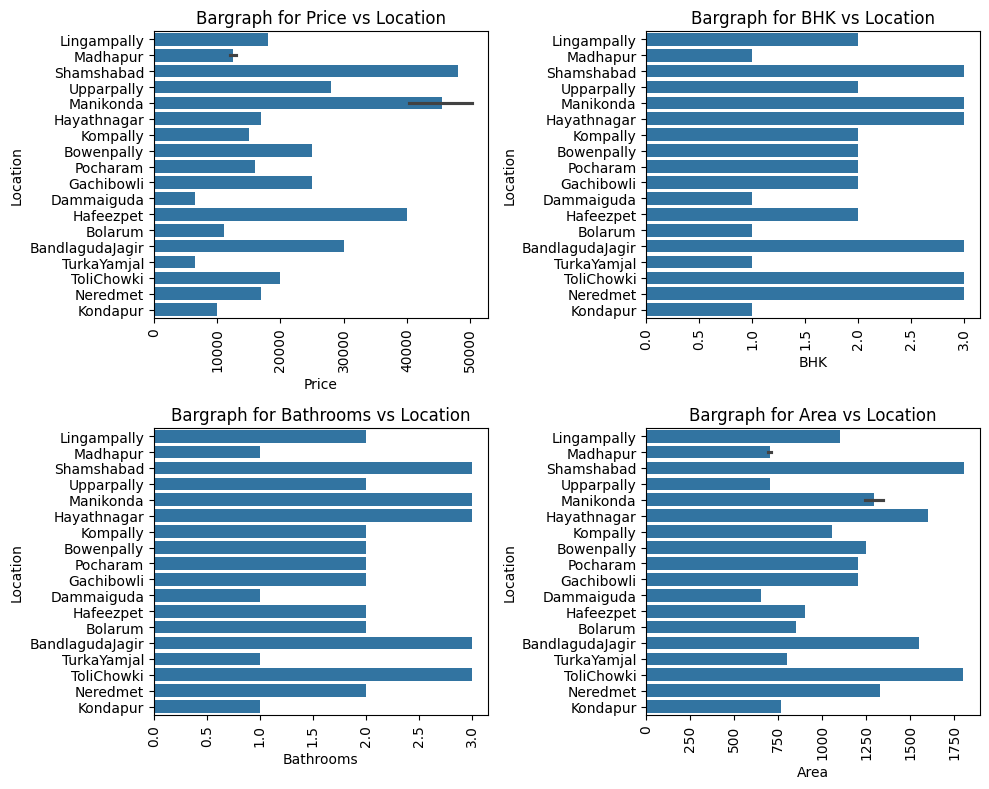

In [ ]:
# Numerical vs Categorical (bar plot)
# Location vs BHK
# Lcation vs Bathrooms
# Location vs Price
# Location vs Area

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.barplot(x='Price',y='Location',data=data1,estimator=np.mean)
plt.title('Bargraph for Price vs Location')
plt.xticks(rotation=90)
# Avg price of properties in shamshabad and manikonda are higher . This might because of the IT sector and International Airport.
# Even though equal number of properties listed in most of the areas , but the avg price variesdepening on the demand.


plt.subplot(2,2,2)
sns.barplot(x='BHK',y='Location',data=data1,estimator=np.mean)
plt.title('Bargraph for BHK vs Location')
plt.xticks(rotation=90)
# We have almost equal number 1bhk,2,bhk and 3bhk properties.

plt.subplot(2,2,3)
sns.barplot(x='Bathrooms',y='Location',data=data1,estimator=np.mean)
plt.title('Bargraph for Bathrooms vs Location')
plt.xticks(rotation=90)
# More number of properties listed are having 2 bathrooms.

plt.subplot(2,2,4)
sns.barplot(x='Area',y='Location',data=data1,estimator=np.mean)
plt.title('Bargraph for Area vs Location')
plt.xticks(rotation=90)
# In most of the areas properties listed are in the range 800-1250 sqft except that of shamshabd,hayathnagar,Tolichowki,Bandlagudajagir.
# They lies in the range 1500 - 1800 sqft.

plt.tight_layout()
plt.show()

In [ ]:
pivot_location = data1.pivot_table(values='Price', index='Location', aggfunc='mean').reset_index()
pivot_property_type = data1.pivot_table(values='BHK', index='Location', aggfunc='mean').reset_index()
pivot_furnishing = data1.pivot_table(values='Bathrooms', index='Location', aggfunc='mean').reset_index()
pivot_facing = data1.pivot_table(values='Area', index='Location', aggfunc='mean').reset_index()
print(" pivot table for Location vs Price")
print(pivot_location)
print('')
print("pivot table for Location vs BHK")
print(pivot_property_type)
print('')
print("pivot table for Location vs Bathrooms")
print(pivot_furnishing)
print('')
print("pivot table for Location vs Area")
print(pivot_facing)

 pivot table for Location vs Price
           Location  Price
0   BandlagudaJagir  30000
1           Bolarum  11000
2        Bowenpally  25000
3        Dammaiguda   6500
4        Gachibowli  25000
5         Hafeezpet  40000
6       Hayathnagar  17000
7          Kompally  15000
8          Kondapur  10000
9       Lingampally  18000
10         Madhapur  12500
11        Manikonda  45500
12         Neredmet  17000
13         Pocharam  16000
14       Shamshabad  48000
15       ToliChowki  20000
16      TurkaYamjal   6500
17       Upparpally  28000

pivot table for Location vs BHK
           Location  BHK
0   BandlagudaJagir    3
1           Bolarum    1
2        Bowenpally    2
3        Dammaiguda    1
4        Gachibowli    2
5         Hafeezpet    2
6       Hayathnagar    3
7          Kompally    2
8          Kondapur    1
9       Lingampally    2
10         Madhapur    1
11        Manikonda    3
12         Neredmet    3
13         Pocharam    2
14       Shamshabad    3
15       ToliChowki

<Figure size 1800x1200 with 0 Axes>

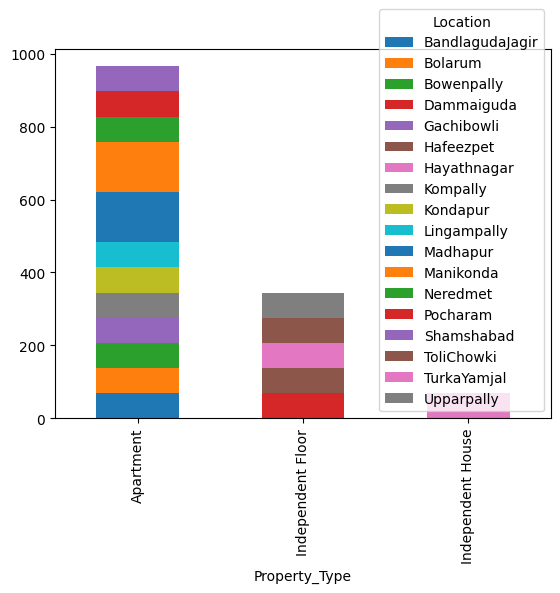

In [ ]:
# Categorical vs Categorical ( cross tab)
# Property_Type vs Location
# Furnishing vs Location
# Facing vs Location

ct1 = pd.crosstab(data1['Property_Type'],data1['Location'])
plt.figure(figsize=(18,12))
ct1.plot(kind = 'bar',stacked = True)
plt.xticks(rotation = 90)
plt.show()

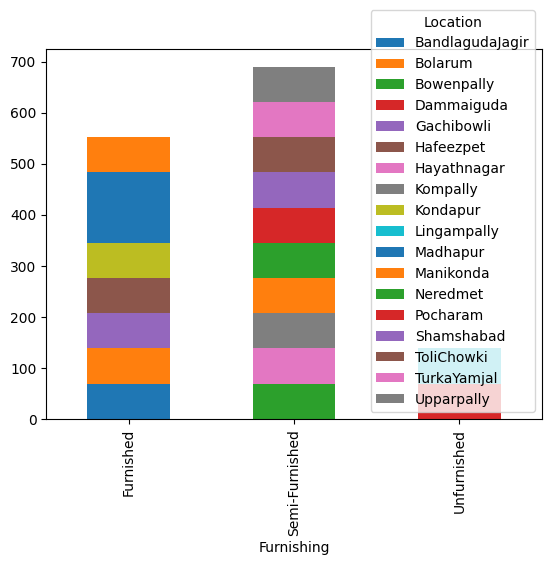

In [ ]:
ct1 = pd.crosstab(data1['Furnishing'],data1['Location'])
ct1.plot(kind = 'bar',stacked = True)
plt.xticks(rotation = 90)
plt.show()

<Figure size 1800x1200 with 0 Axes>

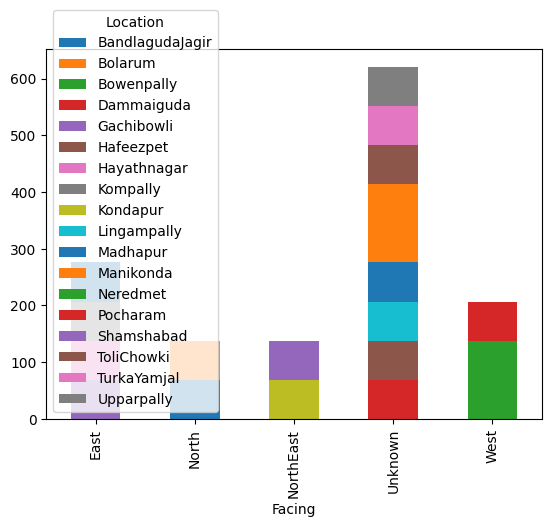

In [ ]:
ct1 = pd.crosstab(data1['Facing'],data1['Location'])
plt.figure(figsize=(18,12))
ct1.plot(kind = 'bar',stacked = True)
plt.xticks(rotation = 90)
plt.show()

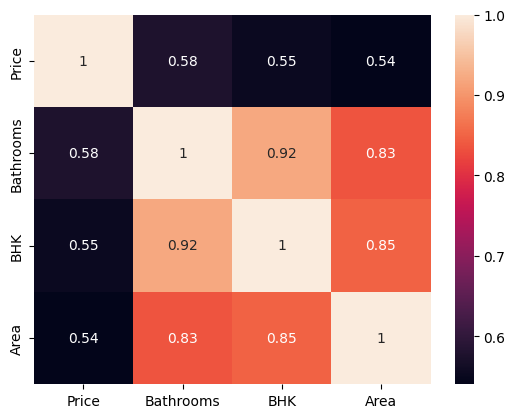

In [ ]:
# Multivariate Analysis
# you can the relationship between the numerical columns .
# corelation coefficient lies in the range -1 to +1.
# Based on the value we can tell relationship between , if it is weak,strong and if it is negative or positive also.
sns.heatmap(data1[['Price','Bathrooms','BHK','Area']].corr(),annot = True)
plt.show()